## Assignment-12: TensorFlow and Keras: Build various MLP architectures for MNIST dataset

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal


Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tenso

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] (one hot representation)
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
print('input dimensions:',input_dim,)

input dimensions: 784


## 1) 2-Hidden layer Architecture (784-472-168-10)


### 1.1 MLP + ReLU activation function + ADAM optimizer

In [14]:
from keras.initializers import he_normal
import warnings
warnings.filterwarnings("ignore")
model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(168, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history11 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

W0818 11:16:39.769354 140217894131520 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 11:16:39.781115 140217894131520 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 11:16:39.783540 140217894131520 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0818 11:16:39.800450 140217894131520 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform in

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_2 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2344 - acc: 0.9320 - val_loss: 0.1033 - val_acc: 0.9694
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0872 - acc: 0.9738 - val_loss: 0.0851 - val_acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step 

Test score: 0.10111289650749382
Test accuracy: 0.979


<IPython.core.display.Javascript object>


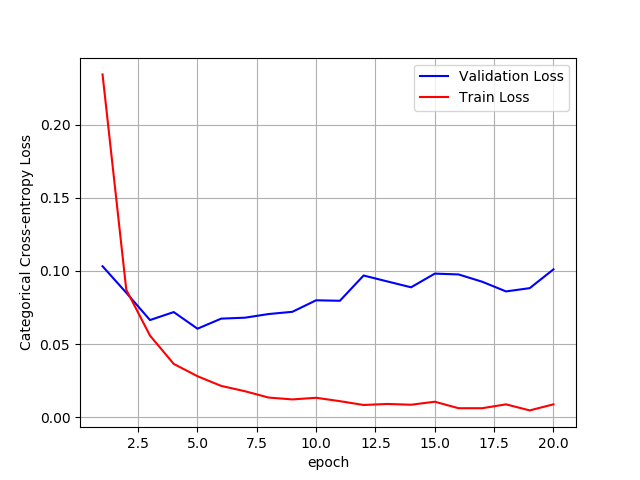

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax11.set_ylabel('Categorical Cross-entropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy11 = history11.history['val_loss']
ty11 = history11.history['loss']
plt_dynamic(x, vy11, ty11, ax11)

<IPython.core.display.Javascript object>


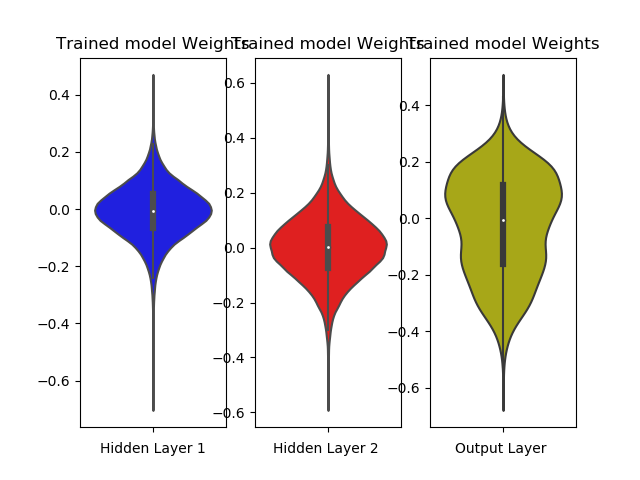

In [16]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU activation function + RMSprop optimizer

In [17]:
from keras.initializers import he_normal
import warnings
warnings.filterwarnings("ignore")
model_relu = Sequential()
model_relu.add(Dense(472, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(168, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history11 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 472)               370520    
_________________________________________________________________
dense_5 (Dense)              (None, 168)               79464     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1690      
Total params: 451,674
Trainable params: 451,674
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2273 - acc: 0.9312 - val_loss: 0.1277 - val_acc: 0.9582
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0854 - acc: 0.9732 - val_loss: 0.0855 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step 

Test score: 0.13976741824084157
Test accuracy: 0.9809


<IPython.core.display.Javascript object>


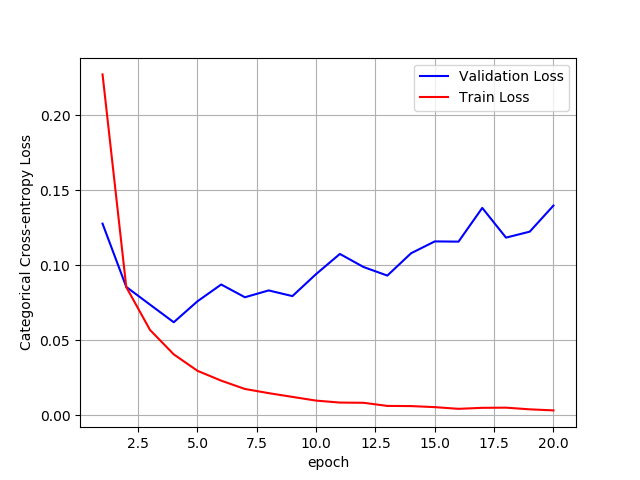

In [18]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax11.set_ylabel('Categorical Cross-entropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy11 = history11.history['val_loss']
ty11 = history11.history['loss']
plt_dynamic(x, vy11, ty11, ax11)

<IPython.core.display.Javascript object>


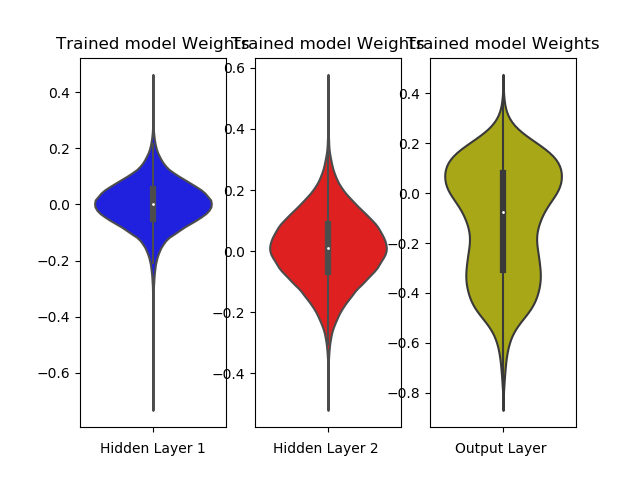

In [19]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 1.2 MLP + Batch-Norm on hidden Layers + Adam Optimizer

In [20]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(472, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(168, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 472)               370520    
_________________________________________________________________
batch_normalization_1 (Batch (None, 472)               1888      
_________________________________________________________________
dense_8 (Dense)              (None, 168)               79464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 168)               672       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1690      
Total params: 454,234
Trainable params: 452,954
Non-trainable params: 1,280
_________________________________________________________________


In [21]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history12 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1872 - acc: 0.9437 - val_loss: 0.1048 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0699 - acc: 0.9789 - val_loss: 0.0926 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0824 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0861 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0273 - acc: 0.9913 - val_loss: 0.0790 - val_acc: 0.9755
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0211 - acc: 0.9930 - val_loss: 0.0764 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0752 - val_acc

Test score: 0.08932151498529384
Test accuracy: 0.9797


<IPython.core.display.Javascript object>


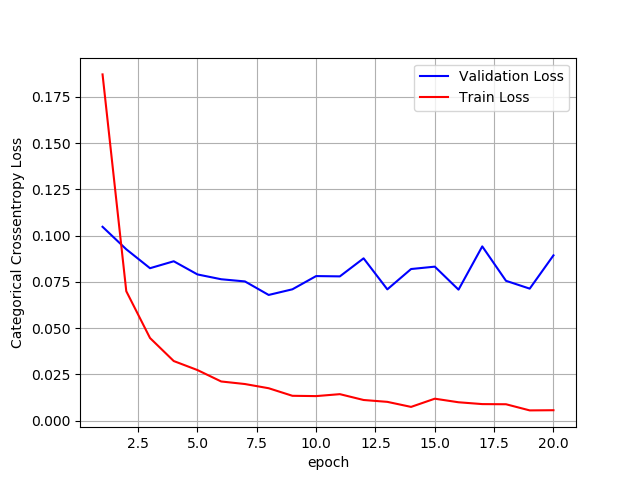

In [22]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history11.history['acc']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history12.history['val_loss']
ty12 = history12.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

<IPython.core.display.Javascript object>


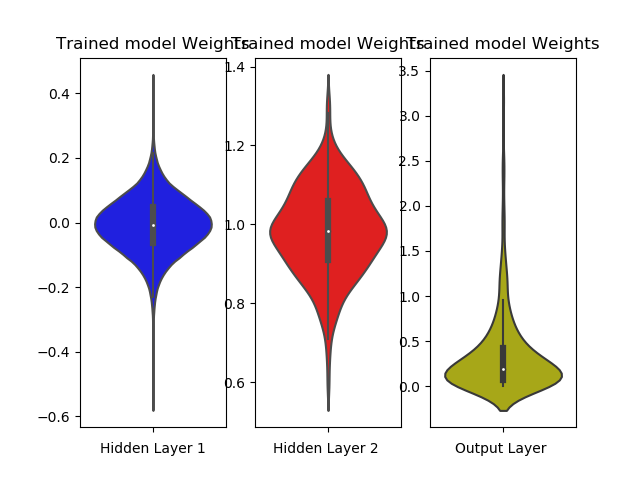

In [23]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Batch-Norm on hidden Layers + Adagrad Optimizer

In [24]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(472, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(168, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.compile(optimizer='adagrad', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history12 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1549 - acc: 0.9541 - val_loss: 0.0866 - val_acc: 0.9746
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0572 - acc: 0.9836 - val_loss: 0.0676 - val_acc: 0.9795
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0339 - acc: 0.9912 - val_loss: 0.0652 - val_acc: 0.9803
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0220 - acc: 0.9950 - val_loss: 0.0593 - val_acc: 0.9823
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0142 - acc: 0.9976 - val_loss: 0.0601 - val_acc: 0.9813
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0101 - acc: 0.9986 - val_loss: 0.0592 - val_acc: 0.9826
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0074 - acc: 0.9992 - val_loss: 0.0571 - val_acc

Test score: 0.060404907803970856
Test accuracy: 0.9843


<IPython.core.display.Javascript object>


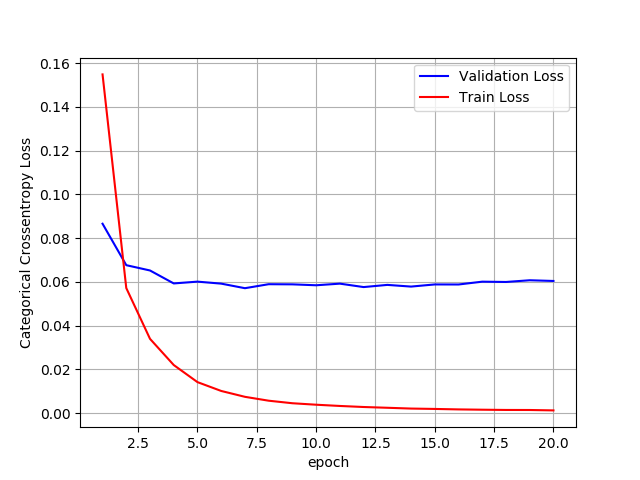

In [25]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history11.history['acc']

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax12.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy12 = history12.history['val_loss']
ty12 = history12.history['loss']
plt_dynamic(x, vy12, ty12, ax12)

<IPython.core.display.Javascript object>


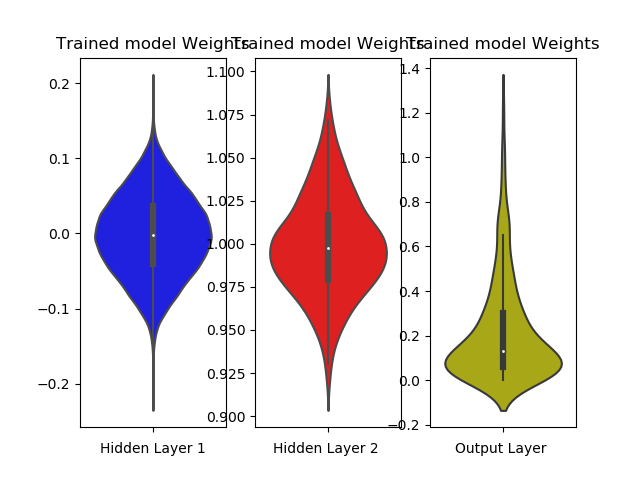

In [26]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 1.3 MLP + Dropout + AdamOptimizer

In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(168, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

W0818 11:21:10.975695 140217894131520 deprecation.py:506] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 472)               370520    
_________________________________________________________________
batch_normalization_5 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_1 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 168)               79464     
_________________________________________________________________
batch_normalization_6 (Batch (None, 168)               672       
_________________________________________________________________
dropout_2 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1690      
Total para

In [28]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history13 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4263 - acc: 0.8711 - val_loss: 0.1414 - val_acc: 0.9557
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2022 - acc: 0.9400 - val_loss: 0.1110 - val_acc: 0.9667
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1594 - acc: 0.9509 - val_loss: 0.0941 - val_acc: 0.9705
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1349 - acc: 0.9581 - val_loss: 0.0790 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1176 - acc: 0.9637 - val_loss: 0.0763 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1087 - acc: 0.9663 - val_loss: 0.0764 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0976 - acc: 0.9701 - val_loss: 0.0635 - val_acc

Test score: 0.05593528219778964
Test accuracy: 0.9836


<IPython.core.display.Javascript object>


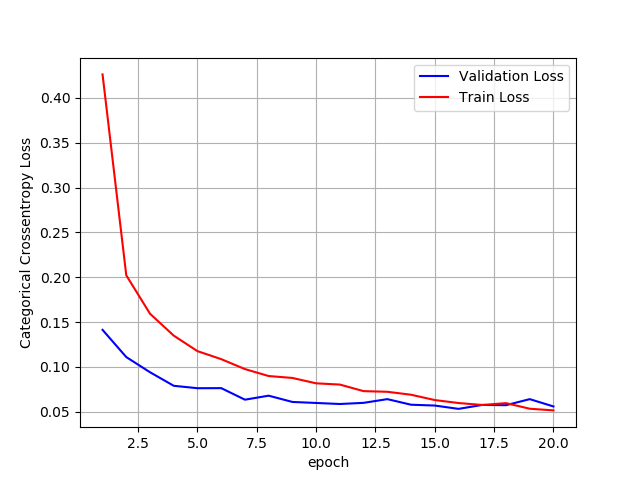

In [29]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history13.history['val_loss']
ty13 = history13.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

<IPython.core.display.Javascript object>


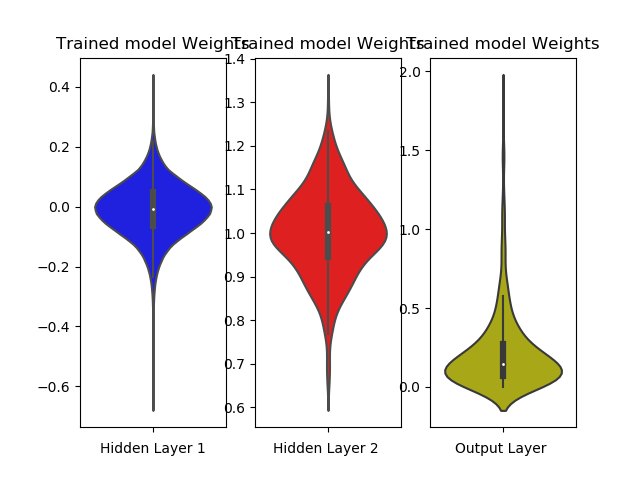

In [30]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Dropout + Adadelta Optimizer

In [31]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(472, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(168, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 472)               370520    
_________________________________________________________________
batch_normalization_7 (Batch (None, 472)               1888      
_________________________________________________________________
dropout_3 (Dropout)          (None, 472)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 168)               79464     
_________________________________________________________________
batch_normalization_8 (Batch (None, 168)               672       
_________________________________________________________________
dropout_4 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1690      
Total para

In [32]:
model_drop.compile(optimizer='adadelta',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history13 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3931 - acc: 0.8808 - val_loss: 0.1345 - val_acc: 0.9589
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1973 - acc: 0.9409 - val_loss: 0.1051 - val_acc: 0.9677
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1523 - acc: 0.9533 - val_loss: 0.0853 - val_acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1245 - acc: 0.9615 - val_loss: 0.0800 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1114 - acc: 0.9657 - val_loss: 0.0712 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0985 - acc: 0.9698 - val_loss: 0.0675 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0880 - acc: 0.9724 - val_loss: 0.0633 - val_acc

Test score: 0.05253026305373642
Test accuracy: 0.984


<IPython.core.display.Javascript object>


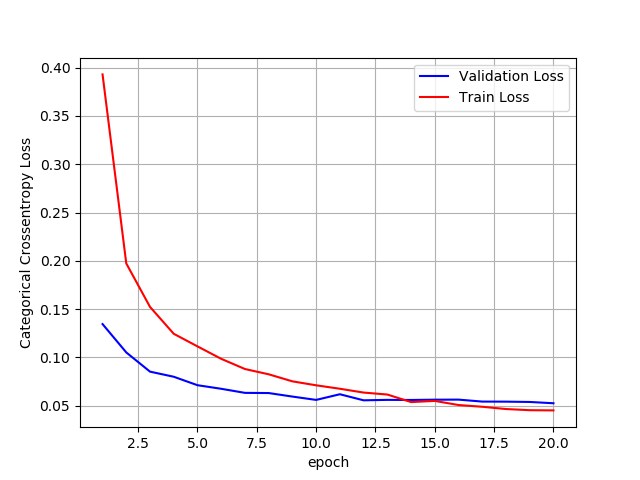

In [33]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax13.set_ylabel('Categorical Crossentropy Loss')

vy13 = history13.history['val_loss']
ty13 = history13.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

<IPython.core.display.Javascript object>


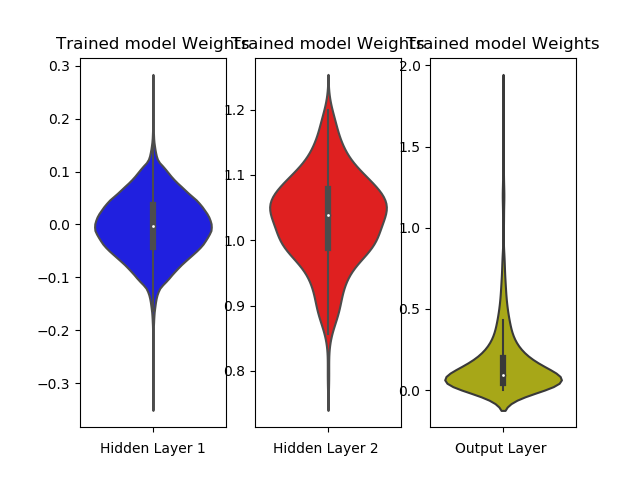

In [34]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2) 3-Hidden layer architecture (784-352-164-124 architecture)

## 2.1  MLP + ReLU + ADAM 

In [35]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_20 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_21 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2438 - acc: 0.9264 - val_loss: 0.1182 - val_acc: 0.9642
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - los

Test score: 0.10094069364849065
Test accuracy: 0.9798


<IPython.core.display.Javascript object>


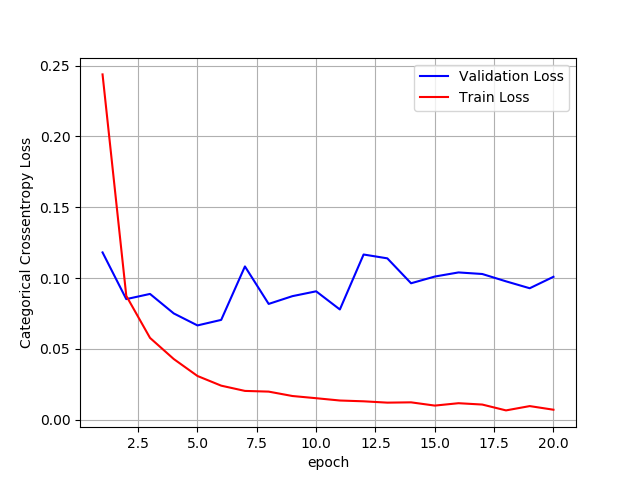

In [36]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

<IPython.core.display.Javascript object>


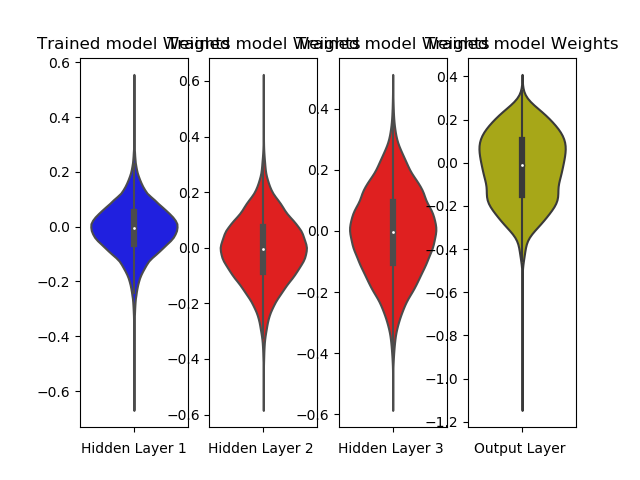

In [38]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + ReLU + Adadelta

In [39]:
model_relu = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adadelta',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_24 (Dense)             (None, 164)               57892     
_________________________________________________________________
dense_25 (Dense)             (None, 124)               20460     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1250      
Total params: 355,922
Trainable params: 355,922
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.2696 - acc: 0.9177 - val_loss: 0.1526 - val_acc: 0.9511
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - los

Test score: 0.08068556088549227
Test accuracy: 0.9857


<IPython.core.display.Javascript object>


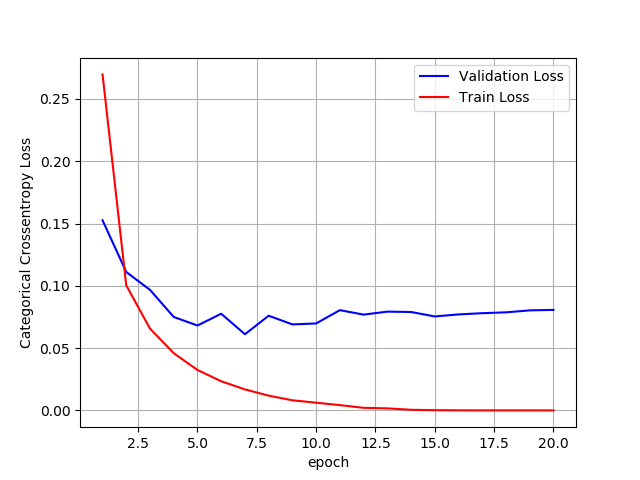

In [40]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax21 = plt.subplots(1,1)
ax21.set_xlabel('epoch') ; ax21.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax21)

<IPython.core.display.Javascript object>


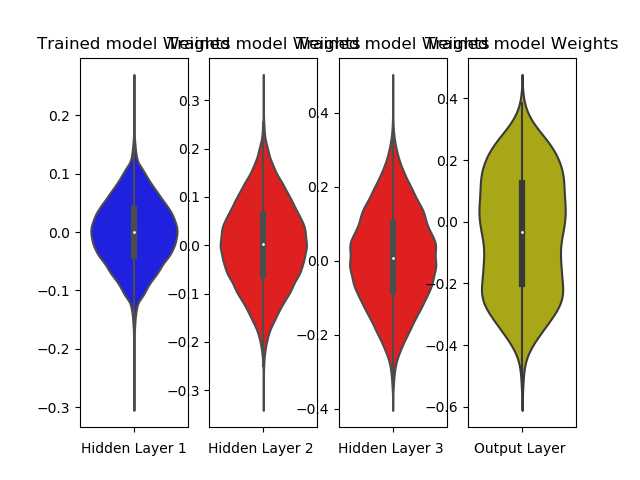

In [41]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [42]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4860 - acc: 0.8565 - val_loss: 0.6053 - val_acc: 0.8472
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3029 - acc: 0.9134 - val_loss: 2.6513 - val_acc: 0.4629
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2857 - acc: 0.9189 - val_loss: 0.8559 - val_acc: 0.7858
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2774 - acc: 0.9219 - val_loss: 0.8852 - val_acc: 0.7914
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2712 - acc: 0.9236 - val_loss: 7.8901 - val_acc: 0.1965
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2689 - acc: 0.9243 - val_loss: 1.0264 - val_acc: 0.7722
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2669 - acc: 0.9258 - val_loss: 1.1807 - val_acc

In [43]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 1.089544097495079
Test accuracy: 0.7509


<IPython.core.display.Javascript object>


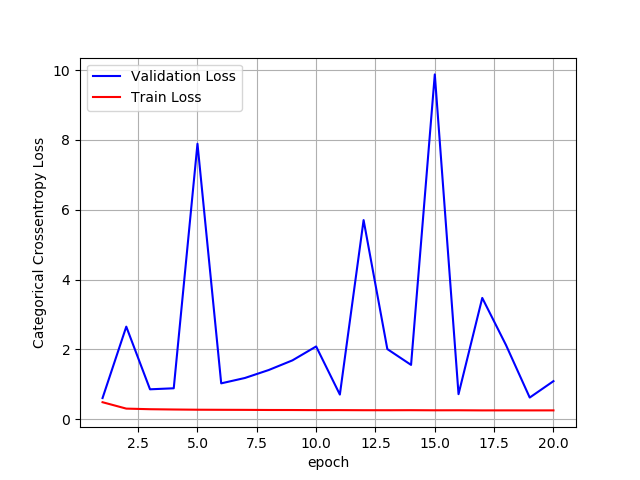

In [44]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

<IPython.core.display.Javascript object>


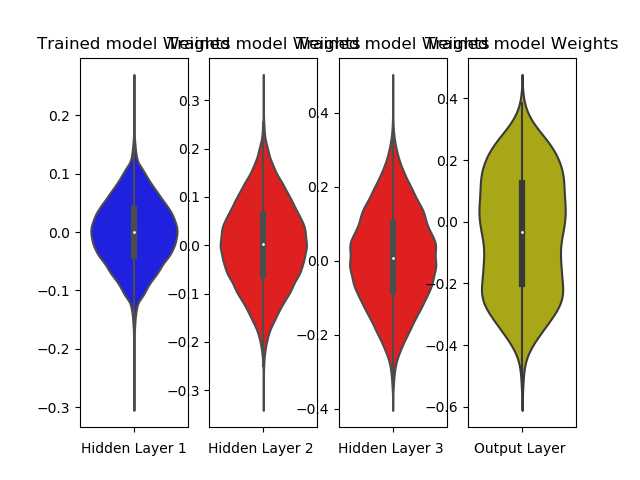

In [45]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Batch-Norm on hidden Layers + RMS Prop Optimizer

In [46]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4528 - acc: 0.8681 - val_loss: 0.8893 - val_acc: 0.7956
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3014 - acc: 0.9146 - val_loss: 0.7591 - val_acc: 0.7998
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2882 - acc: 0.9201 - val_loss: 0.7948 - val_acc: 0.7697
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2804 - acc: 0.9223 - val_loss: 1.9841 - val_acc: 0.6465
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2769 - acc: 0.9234 - val_loss: 1.8222 - val_acc: 0.5741
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2731 - acc: 0.9244 - val_loss: 2.1971 - val_acc: 0.5198
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2717 - acc: 0.9256 - val_loss: 0.9766 - val_acc

Test score: 2.1087711837768555
Test accuracy: 0.5618


<IPython.core.display.Javascript object>


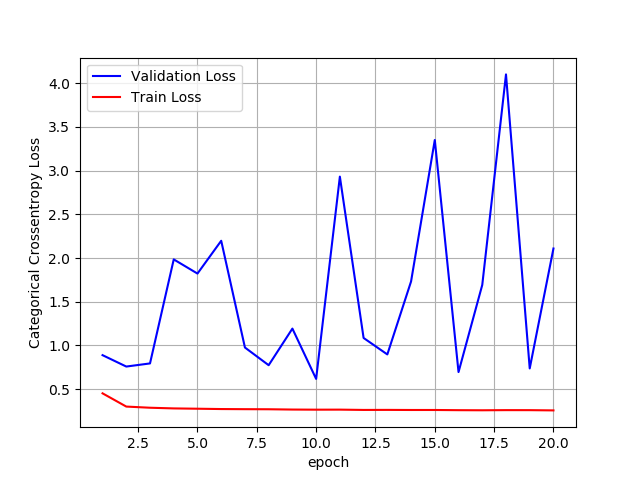

In [47]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

<IPython.core.display.Javascript object>


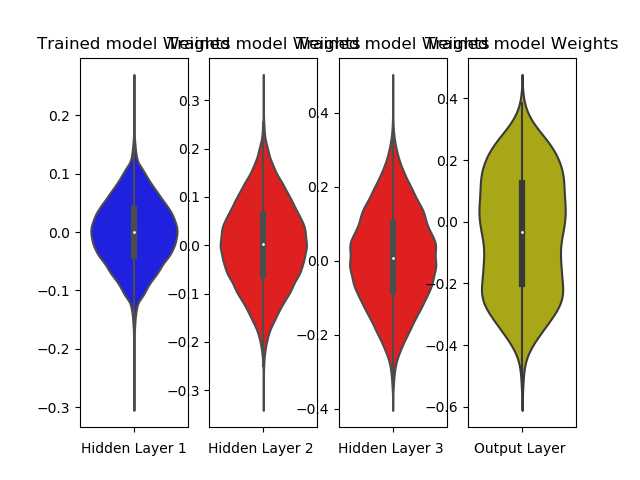

In [48]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.3 MLP + Dropout + AdamOptimizer 

In [49]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))




In [50]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.3786 - acc: 0.5656 - val_loss: 0.5066 - val_acc: 0.8767
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.8568 - acc: 0.7204 - val_loss: 0.4589 - val_acc: 0.8899
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.8374 - acc: 0.7253 - val_loss: 0.4385 - val_acc: 0.8927
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.8287 - acc: 0.7279 - val_loss: 0.4260 - val_acc: 0.8960
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.8302 - acc: 0.7317 - val_loss: 0.4264 - val_acc: 0.8952
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.8247 - acc: 0.7319 - val_loss: 0.4230 - val_acc: 0.8946
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.8203 - acc: 0.7321 - val_loss: 0.4159 - val_acc

In [51]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_6 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_7 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                7850      
Total para

Test score: 0.40103902480602266
Test accuracy: 0.8984


<IPython.core.display.Javascript object>


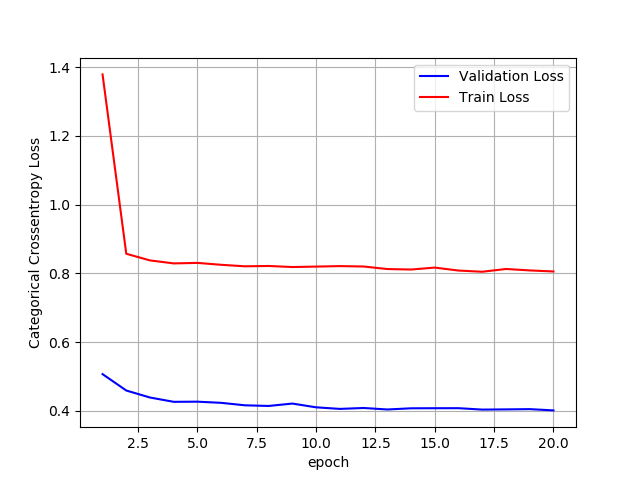

In [52]:
score = model_drop.evaluate(X_test, Y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

<IPython.core.display.Javascript object>


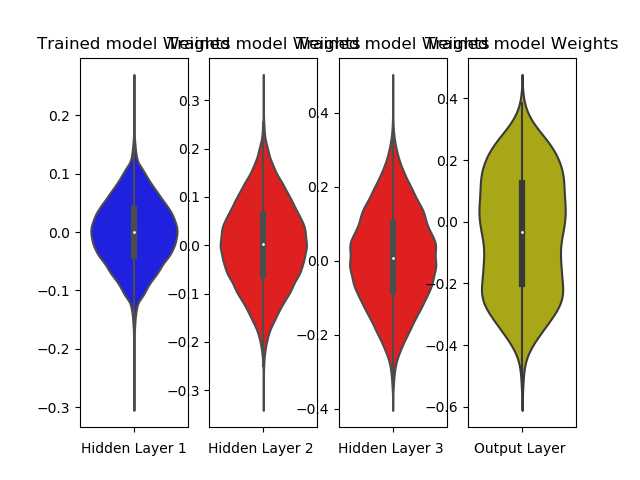

In [53]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + with Different dropout rates + RMS Prop Optimizer

In [54]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 1.0449 - acc: 0.6674 - val_loss: 0.4368 - val_acc: 0.8891
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6637 - acc: 0.7915 - val_loss: 0.3845 - val_acc: 0.8983
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6323 - acc: 0.8020 - val_loss: 0.3641 - val_acc: 0.9003
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6329 - acc: 0.8011 - val_loss: 0.3580 - val_acc: 0.9036
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6290 - acc: 0.8030 - val_loss: 0.3571 - val_acc: 0.9047
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.6293 - acc: 0.8032 - val_loss: 0.3534 - val_acc: 0.9050
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.6248 - acc: 0.8047 - val_loss: 0.3550 - val_acc

Test score: 0.33852629685401914
Test accuracy: 0.9068


<IPython.core.display.Javascript object>


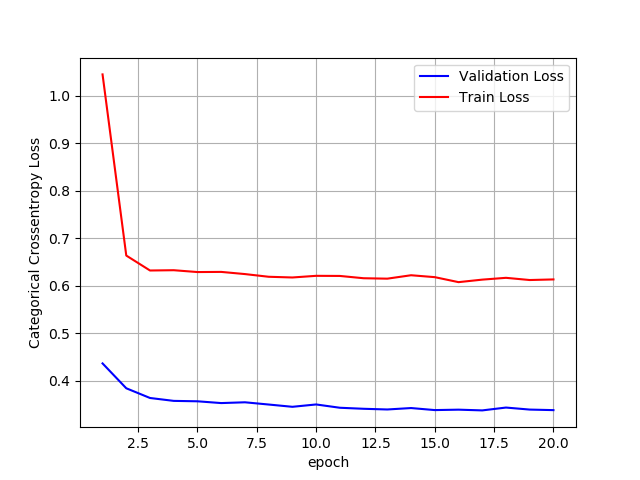

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

<IPython.core.display.Javascript object>


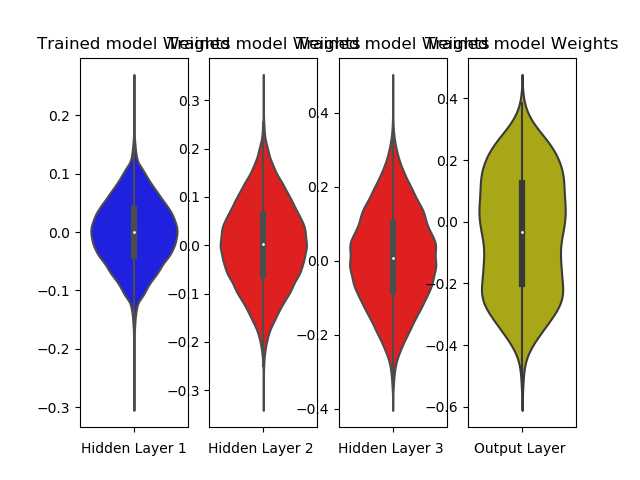

In [56]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3) 5-Hidden layer architecture (784-216-170-136-80-38-10 architecture)

## 3.1  MLP + ReLU + ADAM 

In [57]:
model_relu = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_44 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_45 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_46 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_47 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.09329951099789031
Test accuracy: 0.9778


<IPython.core.display.Javascript object>


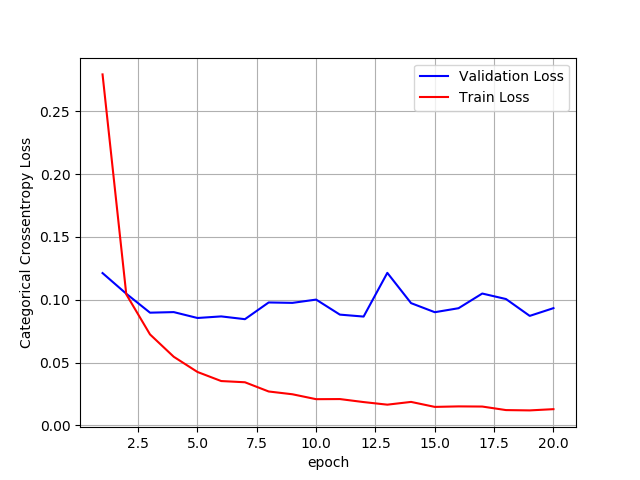

In [58]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)


<IPython.core.display.Javascript object>


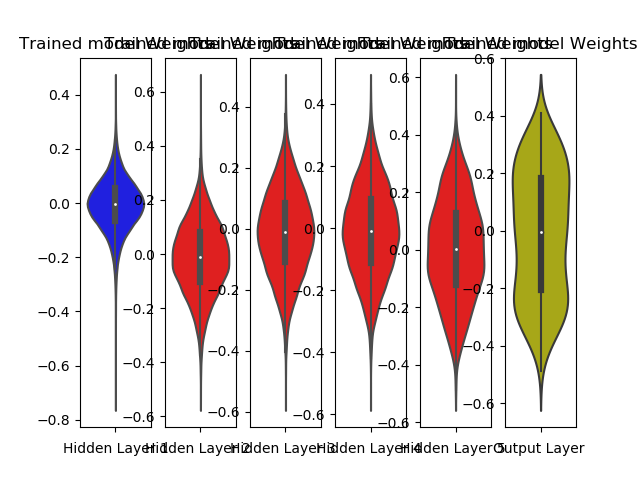

In [60]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + ReLU + rmsprop

In [61]:
model_relu = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 216)               169560    
_________________________________________________________________
dense_50 (Dense)             (None, 170)               36890     
_________________________________________________________________
dense_51 (Dense)             (None, 136)               23256     
_________________________________________________________________
dense_52 (Dense)             (None, 80)                10960     
_________________________________________________________________
dense_53 (Dense)             (None, 38)                3078      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                390       
Total params: 244,134
Trainable params: 244,134
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.13639087163173536
Test accuracy: 0.9792


<IPython.core.display.Javascript object>


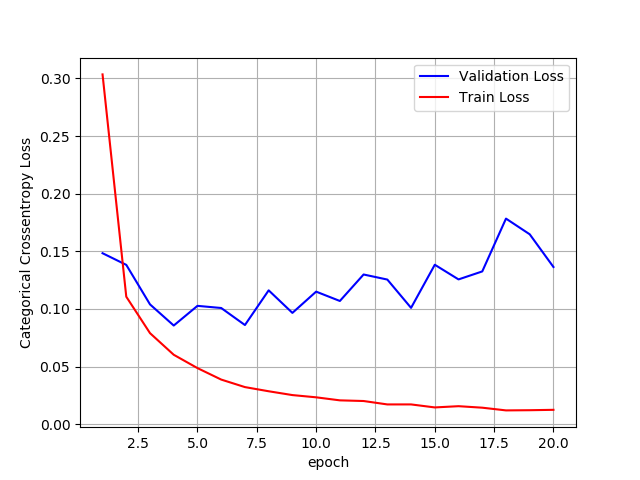

In [62]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)


<IPython.core.display.Javascript object>


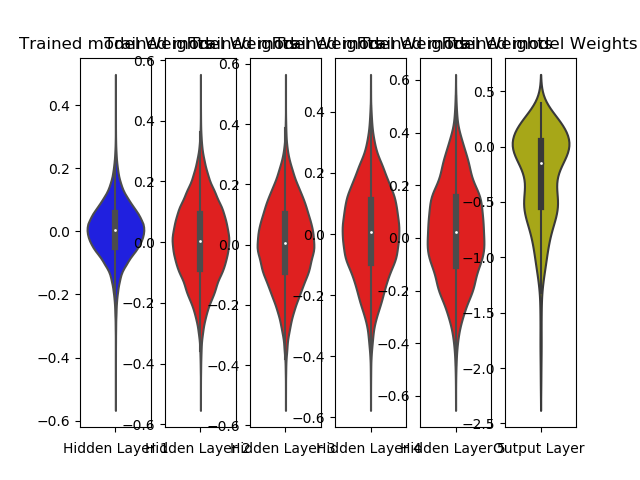

In [63]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [64]:


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))



In [65]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.4931 - acc: 0.8537 - val_loss: 14.2806 - val_acc: 0.1140
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3048 - acc: 0.9124 - val_loss: 14.5466 - val_acc: 0.0975
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2858 - acc: 0.9185 - val_loss: 14.4644 - val_acc: 0.1026
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2785 - acc: 0.9198 - val_loss: 14.4126 - val_acc: 0.1058
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2734 - acc: 0.9234 - val_loss: 14.2581 - val_acc: 0.1154
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2683 - acc: 0.9232 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2662 - acc: 0.9248 - val_loss: 14.5337 - 

In [66]:

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_21 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_22 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_23 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_24 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_25 (Batc (None, 784)               3136      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
_________________________________________________________________


Test score: 14.546580853271484
Test accuracy: 0.0975


<IPython.core.display.Javascript object>


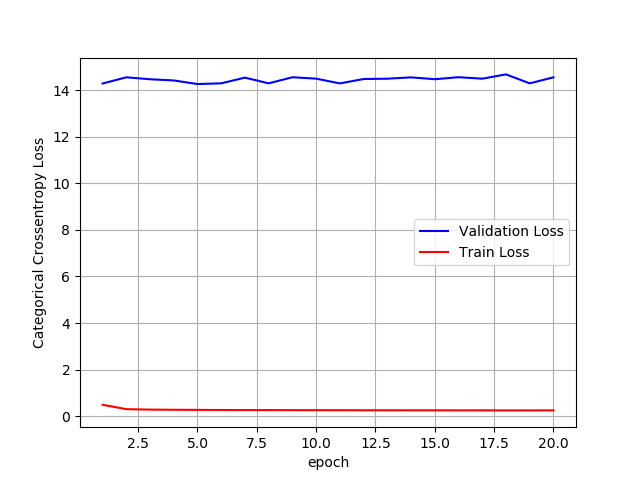

In [67]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

<IPython.core.display.Javascript object>


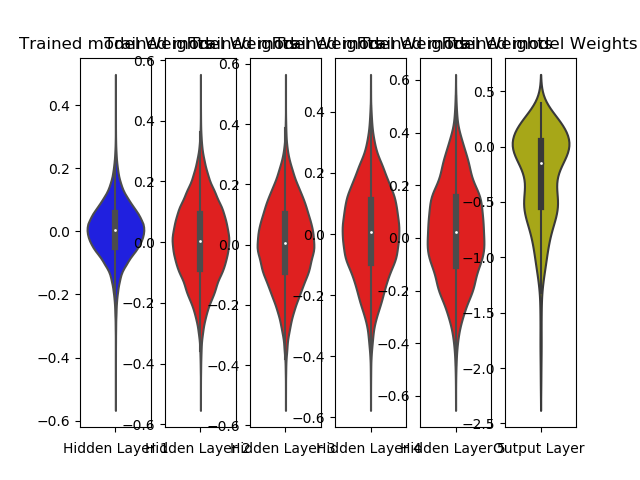

In [68]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Batch-Norm on hidden Layers + Adadelta

In [69]:
model_batch = Sequential()

model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


In [70]:
model_batch.compile(optimizer='adadelta', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.4841 - acc: 0.8597 - val_loss: 14.5256 - val_acc: 0.0988
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3068 - acc: 0.9132 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2891 - acc: 0.9184 - val_loss: 14.4525 - val_acc: 0.1032
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2803 - acc: 0.9213 - val_loss: 14.2806 - val_acc: 0.1140
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2754 - acc: 0.9231 - val_loss: 14.4886 - val_acc: 0.1011
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2723 - acc: 0.9242 - val_loss: 14.4628 - val_acc: 0.1027
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2694 - acc: 0.9256 - val_loss: 14.6820 - 

Test score: 14.528850985717773
Test accuracy: 0.0986


<IPython.core.display.Javascript object>


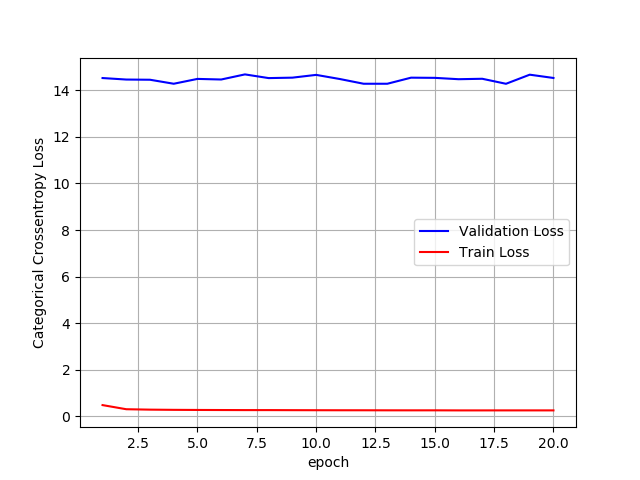

In [71]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

<IPython.core.display.Javascript object>


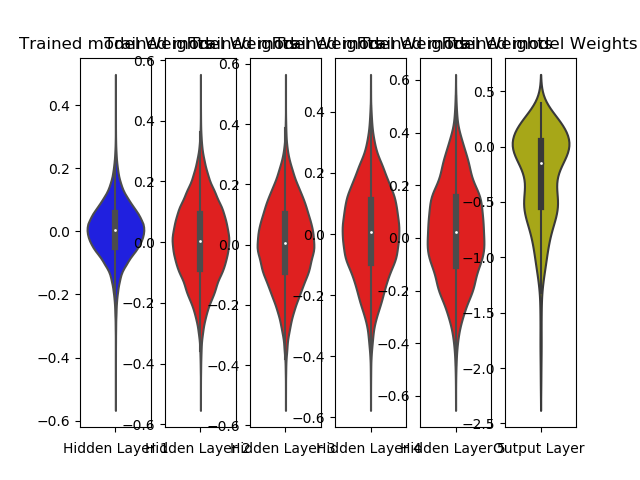

In [72]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.3 MLP + Dropout + AdamOptimizer 

In [73]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


In [74]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 2.1472 - acc: 0.3123 - val_loss: 1.0609 - val_acc: 0.8265
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.6095 - acc: 0.4413 - val_loss: 0.9769 - val_acc: 0.8420
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 1.5983 - acc: 0.4471 - val_loss: 0.9571 - val_acc: 0.8477
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 1.5921 - acc: 0.4479 - val_loss: 0.9511 - val_acc: 0.8460
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 1.5854 - acc: 0.4501 - val_loss: 0.9482 - val_acc: 0.8460
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.5794 - acc: 0.4549 - val_loss: 0.9463 - val_acc: 0.8516
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 1.5878 - acc: 0.4474 - val_loss: 0.9550 - val_acc

In [75]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_31 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_11 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_13 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 784)               3136      
__________

Test score: 0.9357627007484436
Test accuracy: 0.8527


<IPython.core.display.Javascript object>


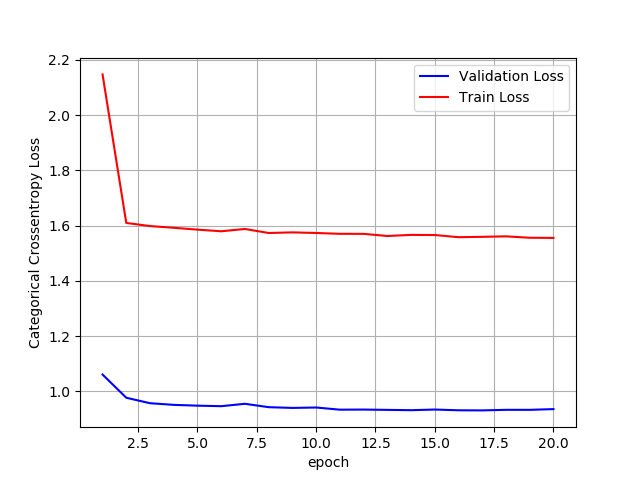

In [76]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

<IPython.core.display.Javascript object>


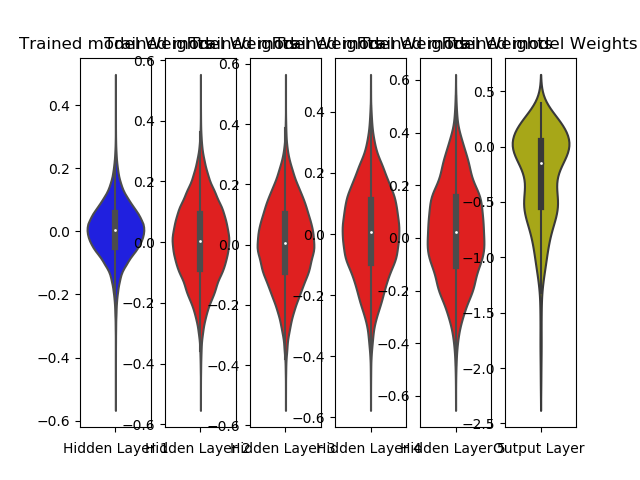

In [77]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP +  different drop out rates + rmsprop optimizer

In [78]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(216, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(136, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))
                                                    
model_relu.add(Dense(38, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(output_dim, activation='softmax'))


In [79]:
model_drop.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.8151 - acc: 0.4056 - val_loss: 0.7996 - val_acc: 0.8484
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.3204 - acc: 0.5537 - val_loss: 0.7085 - val_acc: 0.8581
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.3041 - acc: 0.5607 - val_loss: 0.6967 - val_acc: 0.8635
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.2945 - acc: 0.5616 - val_loss: 0.6833 - val_acc: 0.8666
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.2916 - acc: 0.5623 - val_loss: 0.6804 - val_acc: 0.8624
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.2892 - acc: 0.5648 - val_loss: 0.6773 - val_acc: 0.8664
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.2872 - acc: 0.5626 - val_loss: 0.6751 - val_acc

Test score: 0.6648854620933533
Test accuracy: 0.8705


<IPython.core.display.Javascript object>


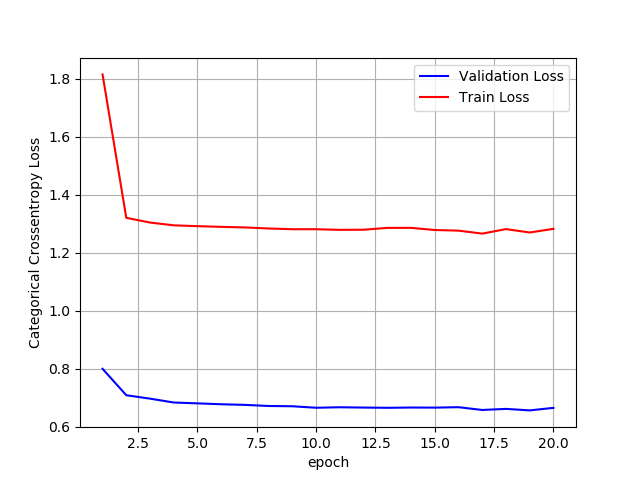

In [80]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

<IPython.core.display.Javascript object>


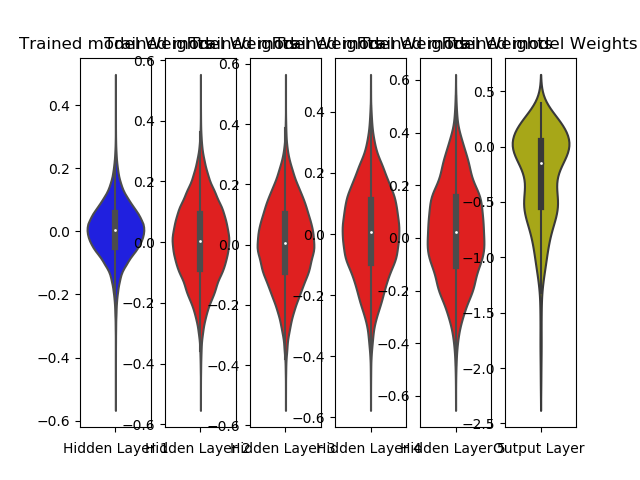

In [81]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Summarizing all the models performance using Pretty Table

In [82]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Model", "Test-acccuracy"]

x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + ReLU activation function + ADAM optimizer",  0.979])
x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + ReLU activation function + RMSprop optimizer", 0.9809])
x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + Batch-Norm on hidden Layers + Adam Optimizer", 0.9797])
x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + Batch-Norm on hidden Layers + Adagrad Optimizer", 0.9843])
x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + Dropout + AdamOptimizer", 0.9836])
x.add_row(["2-Hidden layer Architecture (784-472-168-10):MLP + Dropout + Adadelta Optimizer", 0.984])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP+ReLU+Adam", 0.9798])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP + ReLU + Adadelta", 0.9857])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP + Batch-Norm on hidden Layers + AdamOptimizer", 0.7509])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP + Batch-Norm on hidden Layers + RMS Prop Optimizer", 0.56])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP + Dropout + AdamOptimizer", 0.8984])
x.add_row(["3-Hidden layer architecture (784-352-164-124 architecture):MLP + with Different dropout rates + RMS Prop Optimizer", 0.9068])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + ReLU + ADAM", 0.9778])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + ReLU + rmsprop", 0.9792])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + Batch-Norm on hidden Layers + AdamOptimizer", 0.975])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + Batch-Norm on hidden Layers + Adadelta", 0.986])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + Dropout + AdamOptimizer", 0.8527])
x.add_row(["5-Hidden layer architecture (784-216-170-136-80-38-10 architecture):MLP + different drop out rates + rmsprop optimizer", 0.8705])

print(x)

+------------------------------------------------------------------------------------------------------------------------+----------------+
|                                                         Model                                                          | Test-acccuracy |
+------------------------------------------------------------------------------------------------------------------------+----------------+
|              2-Hidden layer Architecture (784-472-168-10):MLP + ReLU activation function + ADAM optimizer              |     0.979      |
|            2-Hidden layer Architecture (784-472-168-10):MLP + ReLU activation function + RMSprop optimizer             |     0.9809     |
|            2-Hidden layer Architecture (784-472-168-10):MLP + Batch-Norm on hidden Layers + Adam Optimizer             |     0.9797     |
|           2-Hidden layer Architecture (784-472-168-10):MLP + Batch-Norm on hidden Layers + Adagrad Optimizer           |     0.9843     |
|                   

### Conclusion

-- We find that the model with 3-Hidden layer architecture (784-352-164-124 architecture):MLP + ReLU + Adadelta has the higest test accuracy and it has outperformed compared to other models with different architectures.